In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

path = "./archive/laptops.csv"

In [2]:
data = pd.read_csv(path)

data.head()


,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [3]:
data.describe()

,RAM,Storage,Screen,Final Price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


In [4]:
data.columns

Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage type', 'GPU', 'Screen', 'Touch', 'Final Price'],
      dtype='object')

In [5]:
cols_with_missing = [col for col in data.columns
                     if data[col].isnull().any()]

cols_with_missing

['Storage type', 'GPU', 'Screen']

In [6]:
data = data.dropna(subset=['Screen','Storage type'])

data = data.reset_index(drop=True)

data.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [7]:
y = data["Final Price"]
X = data.drop(['Final Price', 'Laptop'], axis=1)

In [8]:
X.head()

,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch
0,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No
1,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No
2,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No
3,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No
4,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No


In [9]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [10]:
train_X.head()

,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch
1626,New,Vant,Edge,Intel Core i7,40,1000,SSD,NaN,14.0,No
578,New,MSI,Raider,Intel Core i7,32,1000,SSD,RTX 4070,17.0,No
1583,New,Microsoft,Surface Laptop,Intel Core i5,16,512,SSD,NaN,13.5,Yes
1630,New,Vant,Edge,Intel Core i7,16,500,SSD,NaN,14.0,No
1391,New,HP,255,AMD Ryzen 3,8,256,SSD,NaN,15.6,No


In [11]:
test_X.head()

,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch
1394,New,HP,255,AMD Ryzen 5,8,256,SSD,NaN,15.6,No
1321,New,Dynabook Toshiba,Portégé,Intel Core i5,16,512,SSD,NaN,13.3,Yes
1773,Refurbished,Asus,TUF,AMD Ryzen 7,16,1000,SSD,RTX 2060,15.6,No
760,New,Asus,VivoBook,Intel Core i7,8,512,SSD,NaN,15.6,No
1217,New,Asus,TUF,AMD Ryzen 7,8,512,SSD,RTX 3060,15.6,No


In [12]:
object_cols = [col for col in train_X.columns if train_X[col].dtype == "object"]


good_label_cols = [col for col in object_cols if set(test_X[col]).issubset(set(train_X[col]))]

bad_label_cols = list(set(object_cols)-set(good_label_cols))

print('Categorical columns that will be ordinal encoded:', good_label_cols)
print('\nCategorical columns that will be dropped from the dataset:', bad_label_cols)

Categorical columns that will be ordinal encoded: ['Status', 'Brand', 'CPU', 'Storage type', 'GPU', 'Touch']

Categorical columns that will be dropped from the dataset: ['Model']


In [13]:
train_X = train_X.drop(bad_label_cols, axis=1)
test_X = test_X.drop(bad_label_cols, axis=1)

In [14]:
categorical_cols = [cname for cname in train_X.columns if
                    train_X[cname].dtype == "object"]

numerical_cols = [cname for cname in train_X.columns if 
                train_X[cname].dtype in ['int64', 'float64']]

print('numerical_cols: ', numerical_cols)
print('categorical_cols: ', categorical_cols)

numerical_cols:  ['RAM', 'Storage', 'Screen']
categorical_cols:  ['Status', 'Brand', 'CPU', 'Storage type', 'GPU', 'Touch']


In [15]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.compose import ColumnTransformer


numerical_transformer = SimpleImputer(strategy='mean') # Your code here

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
#     ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
# ])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('ordinal', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

model = RandomForestRegressor(n_estimators=100, random_state=0)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

In [16]:
pipeline.fit(train_X, train_y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['RAM', 'Storage', 'Screen']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('ordinal',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Status', 'Brand', 'CPU',
                                                   'Storage type', 'GPU',
                                                   'Touch'])])),
                ('model', RandomForestRegressor(random_state=0))])

In [17]:
from sklearn.model_selection import cross_val_score

scores = -1 * cross_val_score(pipeline, test_X, test_y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print(scores)

[284.40439558 276.76732674 238.52302361 311.55236037 279.3416053 ]


In [18]:
preds = pipeline.predict(test_X)

In [19]:
import numpy as np

error = [preds[i] - test_y.iloc[i] for i in range(0, len(preds))]

print(np.nanmean(error))

-0.4281129170254412


In [20]:
pipeline.score(test_X, test_y)

0.8043671566045092

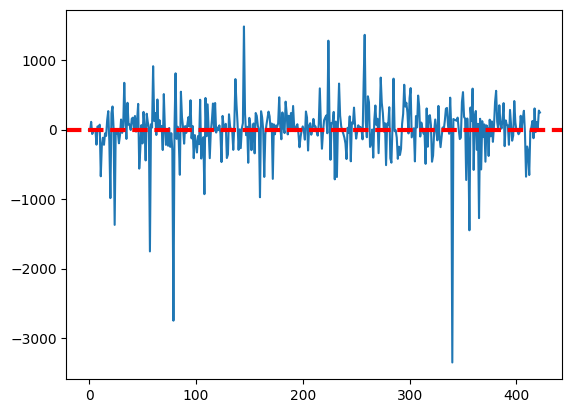

In [21]:
import matplotlib.pyplot as plt

x = range(0, len(preds))

plt.plot(x,error)
plt.axhline(y=np.nanmean(error), color='red', linestyle='--', linewidth=3, label='Avg')



plt.show()